# Removing trajectories going outside the city centre

Input: already cleaned trajectory dataset.
Output: geographically selected trajectory dataset.

Directly copied from Flågen, with some edits to fit our case

In [1]:
# Importing necessary modules

import pandas as pd
import os, shutil

In [2]:
#Path to data file
RAW_DATA_FILE = "../subset_selection/cleaned_data.csv"

#Set max and min coordinates for latitude and longitude
MAX_LON = -8.45
MIN_LON = -8.72
MAX_LAT = 41.26
MIN_LAT = 41.07

In [3]:
# Reading the dataset into dataframe

raw_df = pd.read_csv(RAW_DATA_FILE)

print("Length of data set:")
print(len(raw_df.index))

Length of data set:
1603628


In [4]:
# This cell will read the data and generate a file for each trajectory in the given output directory
# Will choose traces that are within a given rectangle of the city

indexes_to_delete = []

for index, row in raw_df.iterrows():
    trace_id = row["TRIP_ID"] 

    trace = row["POLYLINE"][2:-2].split("],[")

    # If trace are outside bounded rectangle: remove row
    
    for coordinate in trace:

        lon, lat = list(map(float, coordinate.split(",")))

        # Outside bounded rectangle
        if ( not ( MIN_LAT <= lat <= MAX_LAT )) or ( not ( MIN_LON <= lon <= MAX_LON )):
            indexes_to_delete.append(index)
            break
      
raw_df.drop(indexes_to_delete, inplace=True)
raw_df.to_csv('chosen_geographical_area_data.csv', index=False)

In [5]:
print(len(raw_df.index))

1591368


### Just for the purpose of showing the map before and after this cleaning

In [6]:
import geopandas as gpd
import json
from shapely.geometry import LineString, Point

def load_data(fname):
    df = pd.read_csv(fname)
    df['traj'] = json.loads('[' + df.POLYLINE.str.cat(sep=',') + ']')
    df = df[df.traj.str.len() > 1].copy()
    df['lines'] = gpd.GeoSeries(df.traj.apply(LineString))
    return gpd.GeoDataFrame(df, geometry='lines')

df_before = load_data('../subset_selection/cleaned_data.csv')
df_after = load_data('chosen_geographical_area_data.csv')

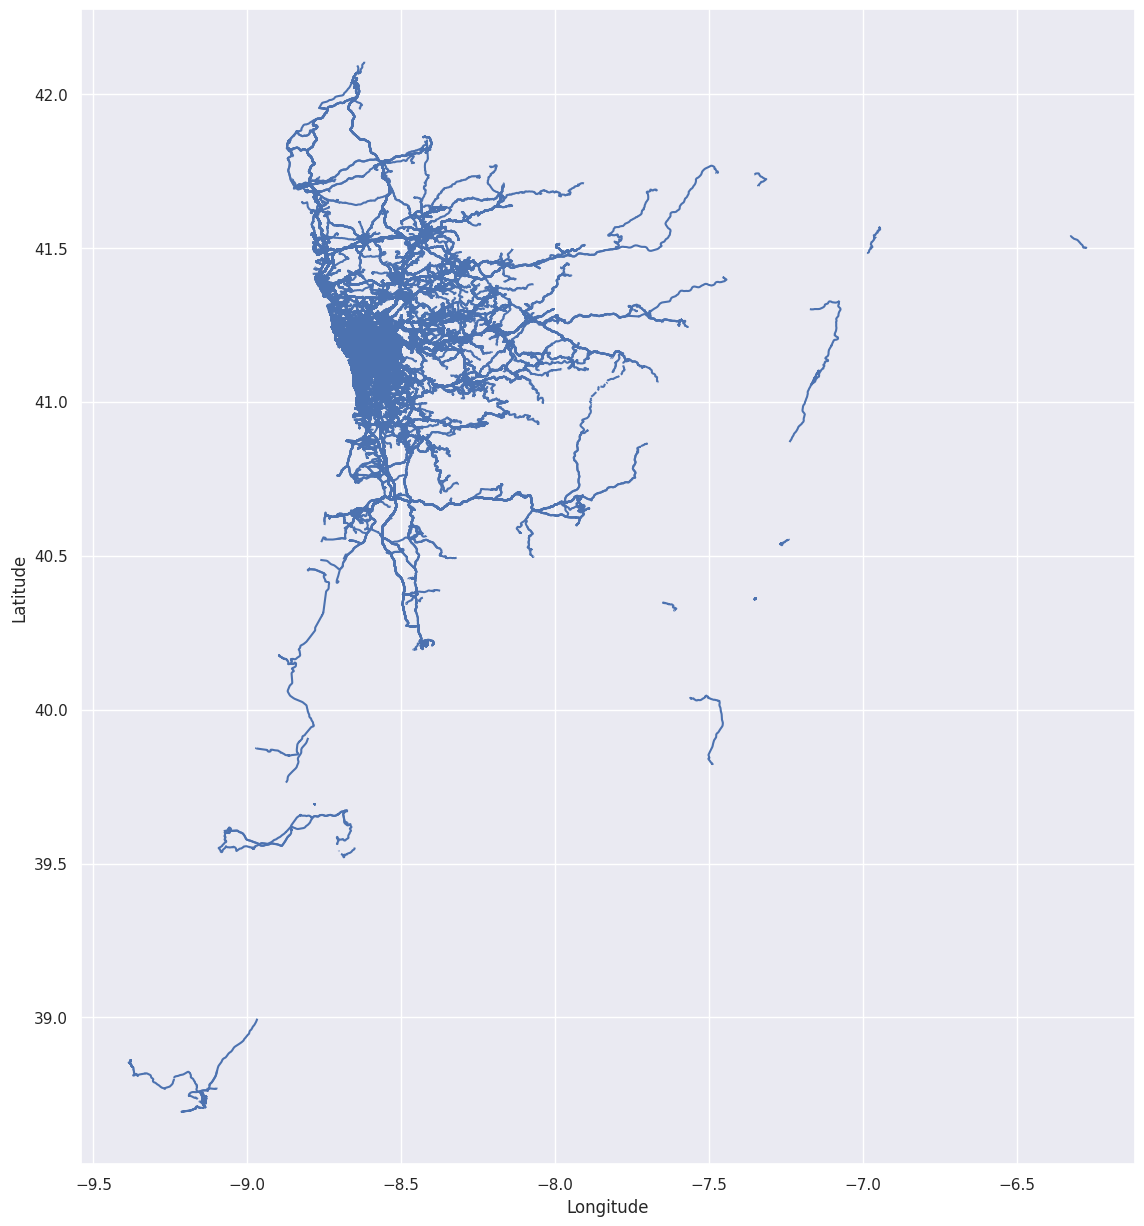

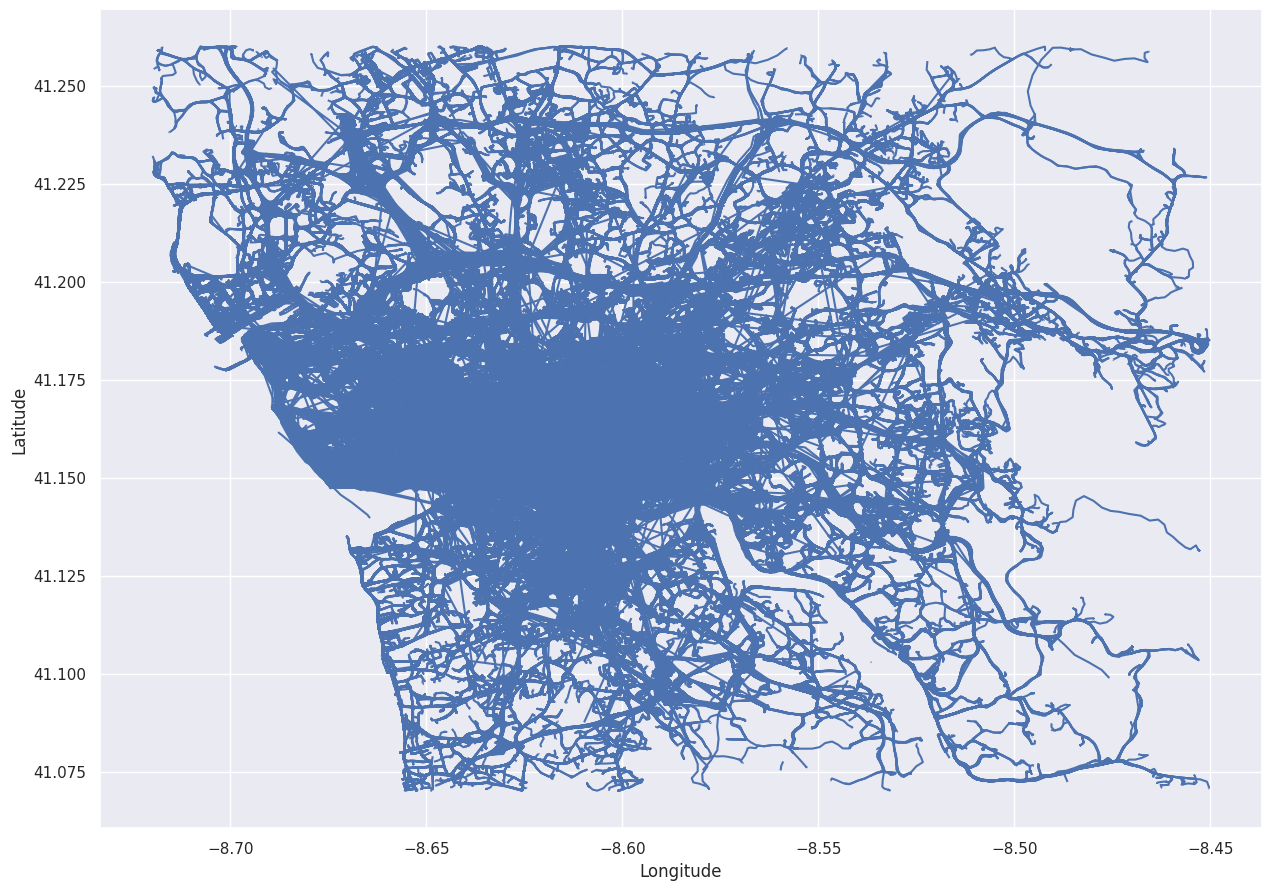

In [7]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,8]
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

df_before.lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');

df_after.lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');